In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())


            Price
Date             
2018-01-02  43.06
2018-01-03  43.06
2018-01-04  43.26
2018-01-05  43.75
2018-01-08  43.59


In [30]:
# 2.  chia train test theo tỉ lệ 7:3
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]




In [31]:

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4285.770, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4282.758, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4280.984, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4281.040, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4284.790, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4282.909, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4282.689, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4284.681, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4283.505, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.729 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [38]:

y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


448


In [33]:

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[164.84670928 164.97036596 165.08639679 165.20288571 165.31934711
 165.43581017 165.55227312 165.66873609 165.78519905 165.90166201
 166.01812497 166.13458793 166.25105089 166.36751386 166.48397682
 166.60043978 166.71690274 166.8333657  166.94982866 167.06629163
 167.18275459 167.29921755 167.41568051 167.53214347 167.64860643
 167.76506939 167.88153236 167.99799532 168.11445828 168.23092124]


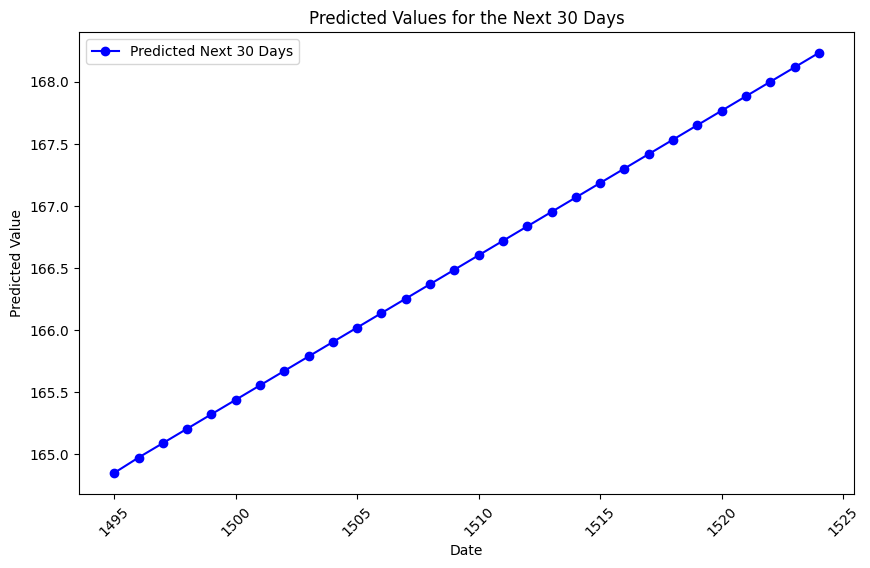

In [34]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 32.39042322337488
Testing MAPE: 0.1883801933635172
Testing MAE: 29.22384105323997


Testing RMSE: 32.39042322337488
Testing MAPE: 0.1883801933635172
Testing MAE: 29.22384105323997


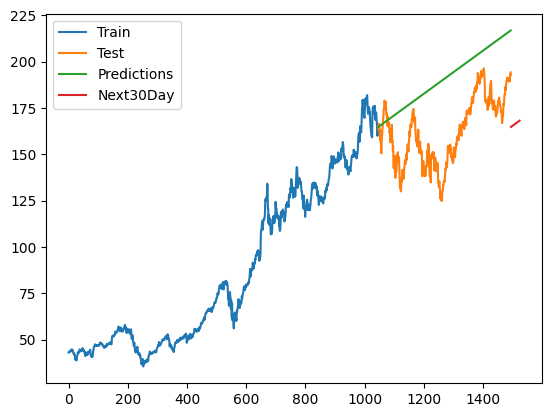

In [36]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [37]:
test_data.index

RangeIndex(start=1046, stop=1494, step=1)